# Predição de Análise de Crédito - Marlysson Silva

## Tabela de conteúdo

- Conhecendo o dataset
- Exploração do Dataset
    - Tratamento dos dados
    - Análise descritiva dos dados
    - Visualizando agrupamentos
    - Correlação entre variáveis
- Predição
    - Algoritmos
        - Naive Bayes
        - AdaBoost
        - OneVsOne
        - OneVsRest
        - K-Folding
        - Random Forest
        - Logistic Regression

## Conhecendo o dataset

Essa análise se baseará no dataset fornecido pelo repositório de dados UCI Machile Learning Repository, onde pode ser encontrado direto através deste [link](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))

### Informações gerais

**NOME:** Statlog (German Credit Data) Data Set

**DESCRIÇÃO: ** Neste dataset da UCI Repository há o conjunto de dados a respeito da qualificação dos clientes de um banco alemão identificando-os como bons ou maus pagadores de empréstimos, ou seja, se são clientes confiáveis para que seja concedido a eles um montante de crédito, com a confiança de que não haverá calote por parte do cliente.

**DIMENSIONALIDADE DO DATASET:** 1000 Linhas x 21 Colunas

### Informações exploratórias

> **COLUNAS DO DATASET E SEUS SIGNIFICADOS**

1. **STATUS OF EXISTING CHECKING ACCOUNT :** Montante existente atualmente na conta.
1. **DURATION IN MONTH :** Significa a duração em meses do empréstimo concedido.
1. **CREDIT HISTORY :** Informações descritivas sobre o histórico financeiro do cliente. Se os créditos antigos dele estão quitados, se ainda está devendo, se até agora os créditos dele estão em bom estado.
1. **PURPOSE :** Propósito destinado para o crédito concedido.
1. **CREDIT AMOUNT :** Montante de crédito requisitado ao banco.
1. **SAVINGS ACCOUNT/BOUNDS :** Montante guardado na conta poupança.
1. **PRESENT EMPLOYMENT SINCE :** Tempo de empregado no atual emprego.
1. **INSTALLMENT RATE IN PERCENTAGE OF DISPOSABLE INCOME :** Taxa de de prestação sobre o montante( rendimento ) que o cliente possui.
1. **PERSONAL STATUS AND SEX :** Estado civil e sexo do cliente.
1. **OTHERS DEBTORS/ GUARANTORS :** Tipo de associação em créditos concedidos que já participou.
1. **PRESENT RESIDENCE SINCE :** Tempo de moradia na residência atual.
1. **PROPERTY :** Propriedades que possui.
1. **AGE IN YEARS :** Idade
1. **OTHERS INSTALLMENT PLANS :** Outros empreendimentos que requerem pagamento de prestações.
1. **HOUSING :** Tipo de propriedade da residência.
1. **NUMBER OF EXISTING CREDITS AT THIS BANK :** Número de créditos já concedidos no banco.
1. **JOB :** Estado do trabalho atual
1. **NUMBER OF PEOPLE BEING LIABLE TO PROVIDE MAINTENANCE FOR :** Total de dependentes.
1. **TELEPHONE :** Indicativo se o cliente possui telefone ou não.
1. **FOREIGN WORKER :** Indicando se o cliente é de outra cidade ou se trabalha na mesma cidade do trabalho.
1. **STATE RISK :** Coluna indicando se o cliente em questão é um bom cliente para permitir créditos ou não.

> **OBJETIVO DO DATASET E DA EXPLORAÇÃO DOS DADOS**

Esse dataset possui alguns atributos com relação ao histórico de crédito do cliente, montante acumulado e algumas outras propriedades com relação à valores monetários.

Com todos esses atributos, balanceando o nível de confiança do cliente é possível com a aplicação de algoritmos de aprendizagem de máquina descobrir se **há risco ou não com relação ao banco ter prejuízo ao conceder crédito à determinado tipo de cliente**.

# Exploração do Dataset

In [303]:
import pandas as pd

**OBS:** O dataset provido inicialmente há um problema de "legibilidade" , pois suas colunas não são nomeadas e seus valores estão preenchidos com valores que não dizem muita coisa sobre o que eles significam. Sabendo disso faremos:

1. Um tratamento inicialmente nas colunas para identificá-las quanto ao que elas significam
1. Mapeamento das siglas usadas para seus reais valores.

> **RENOMEANDO COLUNAS PARA UAM MELHOR VISUALIZAÇÃO**

In [304]:
atributos = ["montante", "duracao", "historico_credito", 
              "proposito", "montante_credito", "poupanca",
              "tempo_empregado","taxa_parcelamento",
              "estado_civil_sexo","tipo_participacao_credito", 
              "tempo_moradia", "propriedade","idade",
              "gastos_adicionais", "habitacao","quantidade_creditos","emprego",
              "dependentes","telefone","trabalhador_estrangeiro","risco"]

In [305]:
df = pd.read_csv("credit_approval.txt",header=None, sep=" ",names=atributos)

In [306]:
df.head(3)

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,estado_civil_sexo,tipo_participacao_credito,...,propriedade,idade,gastos_adicionais,habitacao,quantidade_creditos,emprego,dependentes,telefone,trabalhador_estrangeiro,risco
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


## Transformação dos dados - Limpando dados para melhor visualização

> **Como o DATAFRAME não possuia os valores reais em suas células é necessário um processamento para visualizar as informações relacionadas ao DATAFRAME, como substituir legendas por valores reais, é isso que iremos fazer agora.**

1. Mapear valores das células para melhor descrição
2. Renomear todo o dataframe com essas associações

In [307]:
codigos_historico_de_creditos = {
    "A30": "no credits taken/all credits paid back duly",
    "A31": "all credits at this bank paid back duly",
    "A32": "existing credits paid back duly till now",
    "A33": "delay in paying off in the past",
    "A34": "critical account/other credits existing (not at this bank)"
}

codigos_proposito = {
    "A40": "car(new)",
    "A41": "car(used)",
    "A42": "furniture/equipment",
    "A43": "radio/television",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    "A47": "vacation",
    "A48": "retraining",
    "A49": "business",
    "A410": "others"
}

codigo_estado_civil_sexo = {
    "A91": "male : divorced/separated",
    "A92": "female : divorced/separated/married",
    "A93": "male : single",
    "A94": "male : married/windowed",
    "A95": "female : single"
}

codigos_outros_devedores = {
    "A101": None,
    "A102": "co-applicant",
    "A103": "guarantor",
}

codigos_propriedade = {
    "A121": "real state",
    "A122": "building society/life insurance",
    "A123": "car",
    "A124": "unknown/no property"
}

codigos_planos_de_parcelamento = {
    "A141": "bank",
    "A142": "stores",
    "A143": "None"
}

codigos_residencia = {
    "A151": "rent",
    "A152": "own",
    "A153": "for free"
}

codigos_estado_emprego = {
    "A171": "unemployed/unskilled-non-resident",
    "A172": "unskilled-resident",
    "A173": "skilled employee/official",
    "A174": "management/self-employed/highly qualified employee/officer"
}

codigos_telefone = {
    "A191": None,
    "A192": "yes"
}

codigos_trabalhador_estrangeiro = {
    "A201": "yes",
    "A202": "no"
}

> **Mapeando variáveis contínuas**

In [308]:
codigos_status_atual_conta_corrente = {
    "A11": "< 0",
    "A12": "< 199",
    "A13": ">= 200",
    "A14": None
}

codigos_reserva_poupanca = {
    "A61": "< 100",
    "A62": "< 499",
    "A63": "< 999",
    "A64": ">= 1000",
    "A65": "unknown"
}

codigos_tempo_emprego = {
    "A71": None,
    "A72": "< 1", # Menos de 1 ano
    "A73": "< 4", # Entre 1 ano e menos que 4 anos
    "A74": "< 7", # Entre 4 anos e menos que 7 anos
    "A75": ">= 7" # Mais de 7 anos
}

In [309]:
colunas_para_codigos = {
    "montante"             : codigos_status_atual_conta_corrente,
    "historico_credito"    : codigos_historico_de_creditos,
    "proposito"            : codigos_proposito,
    "poupanca"             : codigos_reserva_poupanca,
    "tempo_empregado"      : codigos_tempo_emprego,
    "estado_civil_sexo"    : codigo_estado_civil_sexo, 
    "tipo_participacao_credito"     : codigos_outros_devedores,
    "propriedade"          : codigos_propriedade,
    "gastos_adicionais": codigos_planos_de_parcelamento,
    "habitacao"            : codigos_residencia,
    "emprego"              : codigos_estado_emprego,
    "telefone"             : codigos_telefone,
    "trabalhador_estrangeiro"  : codigos_trabalhador_estrangeiro
}

> **Mapeando cada colunas associando para seus respectivos valores**

In [310]:
df.replace(colunas_para_codigos,inplace=True)

In [311]:
df.head(3)

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,estado_civil_sexo,tipo_participacao_credito,...,propriedade,idade,gastos_adicionais,habitacao,quantidade_creditos,emprego,dependentes,telefone,trabalhador_estrangeiro,risco
0,< 0,6,critical account/other credits existing (not a...,radio/television,1169,unknown,>= 7,4,male : single,None,...,real state,67,None,own,2,skilled employee/official,1,yes,yes,1
1,< 199,48,existing credits paid back duly till now,radio/television,5951,< 100,< 4,2,female : divorced/separated/married,None,...,real state,22,None,own,1,skilled employee/official,1,None,yes,2
2,None,12,critical account/other credits existing (not a...,education,2096,< 100,< 7,2,male : single,None,...,real state,49,None,own,1,unskilled-resident,2,None,yes,1


In [312]:
df.replace({"unknown":None},inplace=True)

> **TIPOS DAS COLUNAS DO DATASET**

In [313]:
df.dtypes

montante                     object
duracao                       int64
historico_credito            object
proposito                    object
montante_credito              int64
poupanca                     object
tempo_empregado              object
taxa_parcelamento             int64
estado_civil_sexo            object
tipo_participacao_credito    object
tempo_moradia                 int64
propriedade                  object
idade                         int64
gastos_adicionais            object
habitacao                    object
quantidade_creditos           int64
emprego                      object
dependentes                   int64
telefone                     object
trabalhador_estrangeiro      object
risco                         int64
dtype: object

> **EXPLORAÇÃO DOS CAMPOS NULOS**

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
montante                     606 non-null object
duracao                      1000 non-null int64
historico_credito            1000 non-null object
proposito                    1000 non-null object
montante_credito             1000 non-null int64
poupanca                     817 non-null object
tempo_empregado              938 non-null object
taxa_parcelamento            1000 non-null int64
estado_civil_sexo            1000 non-null object
tipo_participacao_credito    93 non-null object
tempo_moradia                1000 non-null int64
propriedade                  1000 non-null object
idade                        1000 non-null int64
gastos_adicionais            1000 non-null object
habitacao                    1000 non-null object
quantidade_creditos          1000 non-null int64
emprego                      1000 non-null object
dependentes                  1000 non-null int64
telefo

## Tratamento das colunas

> **CRIAÇÃO DOS CAMPOS: **
- **estado_civil**
- **sexo**

> **JUSTIFICATIVA**
- Poder fazer correlação se o sexo e o estado civil da pessoa interfere no sucesso ou não da disponibilidade de crédito.
- Gráficos descritivos para visualizar distribuição dessas categorias perante o sucesso ou não.

In [315]:
def criar_sexo_e_estado_civil(coluna):
    dados_separados = coluna.split(":")
    
    sexo = dados_separados[0].strip()
    estado_civil = dados_separados[1].strip()

    return pd.Series([sexo,estado_civil])

In [316]:
df[["sexo","estado_civil"]] = df["estado_civil_sexo"].apply(criar_sexo_e_estado_civil)

> **REMOÇÃO DE COLUNAS: **
 - **telefone**
 - **trabalhador_estrangeiro**
 - **estado_civil_sexo ( coluna decomposta )**
 - **tipo_participacao_credito**

> **JUSTIFICATIVA**
- **Telefone:** não possui impacto significativo em estar ou não no dataset, visto que são 2 possíveis valores
- **Trabalhador estrangeiro:** não possui muitos valores que possam impactar no resultado final
- **Estado civil e sexo:** foi removida pois foi decomposta em outras colunas no dataset
- **Tipo participacao credito**: foi removida pois não dá mais detalhes sobre o dado... somente uma descrição e nada mais. Juguei desnecessário o uso.

In [317]:
colunas = ["telefone","trabalhador_estrangeiro", "estado_civil_sexo","gastos_adicionais","tipo_participacao_credito"]
df = df.drop(colunas,axis=1)

In [318]:
df.dtypes

montante               object
duracao                 int64
historico_credito      object
proposito              object
montante_credito        int64
poupanca               object
tempo_empregado        object
taxa_parcelamento       int64
tempo_moradia           int64
propriedade            object
idade                   int64
habitacao              object
quantidade_creditos     int64
emprego                object
dependentes             int64
risco                   int64
sexo                   object
estado_civil           object
dtype: object

## Análise descritiva dos dados

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

> **AGRUPAMENTO DA DISTRIBUIÇÃO DAS QUANTIDADES DE MONTANTES**

Text(0.5,1,'Contagem do montante por tipo')

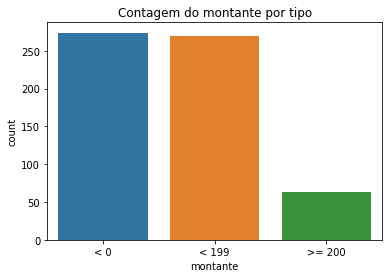

In [320]:
a = sns.countplot(x="montante",data=df)
a.set_title("Contagem do montante por tipo")

> **ANÁLISE DE CORRELAÇÃO ENTRE AS VARIÁVEIS DO DATASET**

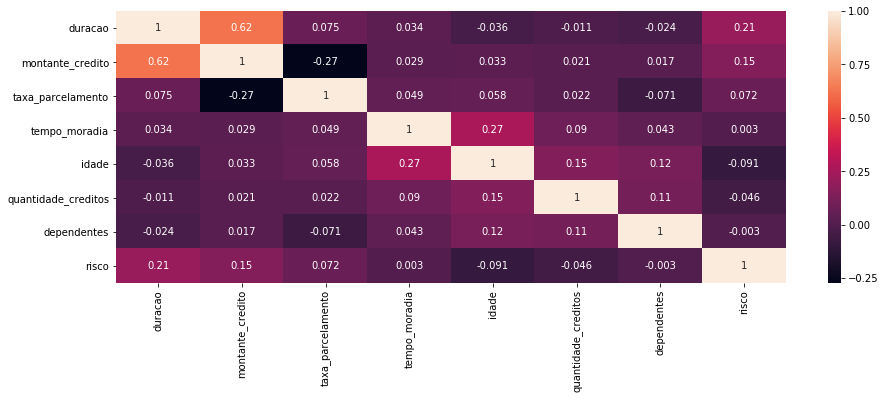

In [321]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),annot=True)

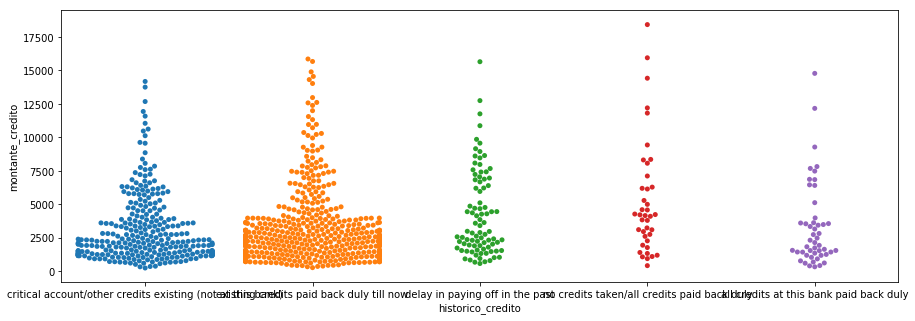

In [322]:
plt.figure(figsize=(15, 5))
sns.swarmplot(x="historico_credito",y="montante_credito",data=df)

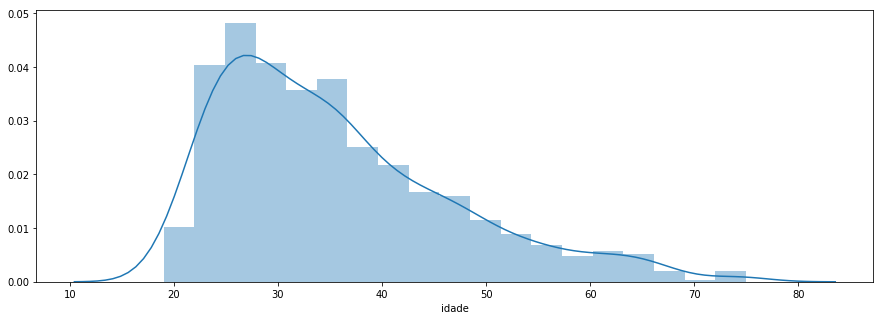

In [323]:
plt.figure(figsize=(15, 5))
sns.distplot(df.idade)

In [324]:
df.head()

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,tempo_moradia,propriedade,idade,habitacao,quantidade_creditos,emprego,dependentes,risco,sexo,estado_civil
0,< 0,6,critical account/other credits existing (not a...,radio/television,1169,None,>= 7,4,4,real state,67,own,2,skilled employee/official,1,1,male,single
1,< 199,48,existing credits paid back duly till now,radio/television,5951,< 100,< 4,2,2,real state,22,own,1,skilled employee/official,1,2,female,divorced/separated/married
2,None,12,critical account/other credits existing (not a...,education,2096,< 100,< 7,2,3,real state,49,own,1,unskilled-resident,2,1,male,single
3,< 0,42,existing credits paid back duly till now,furniture/equipment,7882,< 100,< 7,2,4,building society/life insurance,45,for free,1,skilled employee/official,2,1,male,single
4,< 0,24,delay in paying off in the past,car(new),4870,< 100,< 4,3,4,unknown/no property,53,for free,2,skilled employee/official,2,2,male,single


# Limpando os dados para aplicação dos algoritmos

In [325]:
def mapear_valores(coluna):
    valores = tuple(set(df[coluna].values))

    associados = tuple(range(len(valores)))

    df[coluna].replace(valores,associados,inplace=True)

In [326]:
colunas = ["historico_credito","montante","proposito","poupanca",
           "tempo_empregado","propriedade","habitacao",
           "emprego","sexo","estado_civil"]

for coluna in colunas:
    mapear_valores(coluna)

# Aplicando algoritmos

> **SEPARAÇÃO DOS DADOS PARA TREINO E TESTE**

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
x = df.drop('risco', 1).values
y = df["risco"].values

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

### Algoritmo Naive Bayes

In [350]:
def aplicar_modelo(modelo, x_treino, y_treino, x_teste, y_teste):
    
    modelo.fit(x_treino,y_treino)
    
    risco = modelo.predict(x_teste)
    
    return accuracy_score(y_teste,risco)

In [351]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive = MultinomialNB()

resultado = aplicar_modelo(naive,x_treino,y_treino, x_teste,y_teste)

In [352]:
print("Naive Bayes: {}".format(resultado))

Naive Bayes: 0.616


### Algoritmo Adaboost

In [353]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()

resultado = aplicar_modelo(ada_boost,x_treino,y_treino, x_teste,y_teste)

In [354]:
print("Ada boost: {}".format(resultado))

Ada boost: 0.744


### Algoritmo RandomForest

In [355]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

resultado = aplicar_modelo(random_forest,x_treino,y_treino, x_teste,y_teste)

In [356]:
print("Random Forest: {}".format(resultado))

Random Forest: 0.716


### Algoritmo Regressão Logística

In [357]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

resultado = aplicar_modelo(logistic_regression,x_treino,y_treino, x_teste,y_teste)

In [358]:
print("Regressão Logística: {}".format(resultado))

Regressão Logística: 0.744


### Algoritmo OneVsOne

In [359]:
from sklearn.svm import LinearSVC

In [360]:
from sklearn.multiclass import OneVsOneClassifier

In [361]:
one_vs_one = OneVsOneClassifier(LinearSVC(random_state = 0))

resultado = aplicar_modelo(one_vs_one,x_treino,y_treino, x_teste,y_teste)

In [362]:
print("One vs One classifier: {}".format(resultado))

One vs One classifier: 0.712


### Algoritmo OneVsRest

In [363]:
from sklearn.multiclass import OneVsRestClassifier

one_vs_rest = OneVsRestClassifier(LinearSVC(random_state = 0))

resultado = aplicar_modelo(one_vs_rest,x_treino,y_treino, x_teste,y_teste)

In [364]:
print("One vs Rest classifier : {}".format(resultado))

One vs Rest classifier : 0.712


### Aplicando KNN

In [365]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

resultado = aplicar_modelo(knn,x_treino,y_treino, x_teste,y_teste)

In [366]:
print("KNN classifier: {}".format(resultado))

KNN classifier: 0.656


### Aplicando K-folding

In [367]:
from sklearn.cross_validation import cross_val_score
import numpy as np

algoritmos = [MultinomialNB(), AdaBoostClassifier(), 
              RandomForestClassifier(), LogisticRegression(), 
              OneVsOneClassifier(LinearSVC(random_state = 0)),
              OneVsRestClassifier(LinearSVC(random_state = 0)),
              KNeighborsClassifier()
             ]

resultados = []

k_folding = len(df.columns) // 2

for modelo in algoritmos:
    
    resultado = cross_val_score(modelo,x_treino,y_treino,cv=k_folding)
    resultados.append(np.mean(resultado))
    
    print("Algoritmo: {}\n Resultado: {:.2f}\n".format(str(modelo.__class__).split(".")[-1], np.mean(resultado)))

Algoritmo: MultinomialNB'>
 Resultado: 0.63

Algoritmo: AdaBoostClassifier'>
 Resultado: 0.73

Algoritmo: RandomForestClassifier'>
 Resultado: 0.74

Algoritmo: LogisticRegression'>
 Resultado: 0.73

Algoritmo: OneVsOneClassifier'>
 Resultado: 0.59

Algoritmo: OneVsRestClassifier'>
 Resultado: 0.59

Algoritmo: KNeighborsClassifier'>
 Resultado: 0.65



In [346]:
resultados_series = pd.Series(resultados, index=['Naive Bayes','AdaBoostClassifier',
                                       'RandomForestClassifier','LogisticRegression',
                                       'OneVsOneClassifier','OneVsRestClassifier',
                                      'KNeighborsClassifier'])

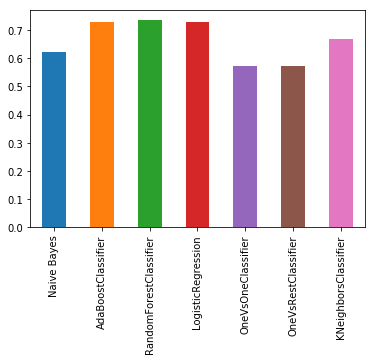

In [347]:
resultados_series.plot(kind="bar")